In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [26]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


train_data = pd.read_csv('/kaggle/input/heartbeat/mitbih_train.csv')
test_data = pd.read_csv('/kaggle/input/heartbeat/mitbih_test.csv')
abnormal_data = pd.read_csv('/kaggle/input/heartbeat/ptbdb_abnormal.csv')
normal_data = pd.read_csv('/kaggle/input/heartbeat/ptbdb_normal.csv')


EDA


In [27]:

print("Train Data Info:")
print(train_data.info())
print("\nTest Data Info:")
print(test_data.info())
print("\nAbnormal Data Info:")
print(abnormal_data.info())
print("\nNormal Data Info:")
print(normal_data.info())


Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87553 entries, 0 to 87552
Columns: 188 entries, 9.779411554336547852e-01 to 0.000000000000000000e+00.88
dtypes: float64(188)
memory usage: 125.6 MB
None

Test Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21891 entries, 0 to 21890
Columns: 188 entries, 1.000000000000000000e+00 to 0.000000000000000000e+00.65
dtypes: float64(188)
memory usage: 31.4 MB
None

Abnormal Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10505 entries, 0 to 10504
Columns: 188 entries, 9.322328567504882812e-01 to 1.000000000000000000e+00.1
dtypes: float64(188)
memory usage: 15.1 MB
None

Normal Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4045 entries, 0 to 4044
Columns: 188 entries, 1.000000000000000000e+00 to 0.000000000000000000e+00.65
dtypes: float64(188)
memory usage: 5.8 MB
None


In [28]:

print("Missing Values in Train Data:")
print(train_data.isnull().sum())

print("\nTrain Data Descriptive Statistics:")
print(train_data.describe())

print("\nMissing Values in Test Data:")
print(test_data.isnull().sum())
print("\nMissing Values in Abnormal Data:")
print(abnormal_data.isnull().sum())
print("\nMissing Values in Normal Data:")
print(normal_data.isnull().sum())


Missing Values in Train Data:
9.779411554336547852e-01       0
9.264705777168273926e-01       0
6.813725233078002930e-01       0
2.450980395078659058e-01       0
1.544117629528045654e-01       0
                              ..
0.000000000000000000e+00.84    0
0.000000000000000000e+00.85    0
0.000000000000000000e+00.86    0
0.000000000000000000e+00.87    0
0.000000000000000000e+00.88    0
Length: 188, dtype: int64

Train Data Descriptive Statistics:
       9.779411554336547852e-01  9.264705777168273926e-01  \
count              87553.000000              87553.000000   
mean                   0.890359                  0.758158   
std                    0.240910                  0.221814   
min                    0.000000                  0.000000   
25%                    0.921922                  0.682482   
50%                    0.991342                  0.826007   
75%                    1.000000                  0.910506   
max                    1.000000                  1.000000

In [34]:
print("Abnormal Data Descriptive Statistics:")
print(abnormal_data.describe())

print("\nNormal Data Descriptive Statistics:")
print(normal_data.describe())


Abnormal Data Descriptive Statistics:
       9.322328567504882812e-01  8.696785569190979004e-01  \
count              10505.000000              10505.000000   
mean                   0.975472                  0.725568   
std                    0.036353                  0.199035   
min                    0.624227                  0.000000   
25%                    0.957327                  0.586560   
50%                    1.000000                  0.745576   
75%                    1.000000                  0.890045   
max                    1.000000                  1.000000   

       8.861859440803527832e-01  9.296264052391052246e-01  \
count              10505.000000              10505.000000   
mean                   0.438264                  0.290324   
std                    0.262676                  0.270918   
min                    0.000000                  0.000000   
25%                    0.236455                  0.074056   
50%                    0.404234               

In [37]:
X_train = train_data.iloc[:, :187].values  
y_train = train_data.iloc[:, 187].values.astype(int)  

X_test = test_data.iloc[:, :187].values  
y_test = test_data.iloc[:, 187].values.astype(int) 

0    72470
1     2223
2     5788
3      641
4     6431
Name: count, dtype: int64


/tmp/ipykernel_55/3680782843.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  chart = sns.countplot(x=train_data.iloc[:,187], palette ="Set2")


([<matplotlib.axis.XTick at 0x7bccc7aa07d0>,
 [Text(0, 0, 'Normal'),
  Text(1, 0, 'Supraventricular Ectopic'),
  Text(2, 0, 'Ventricular Ectopic'),
  Text(3, 0, 'Fusion'),
  Text(4, 0, 'Unknown')])

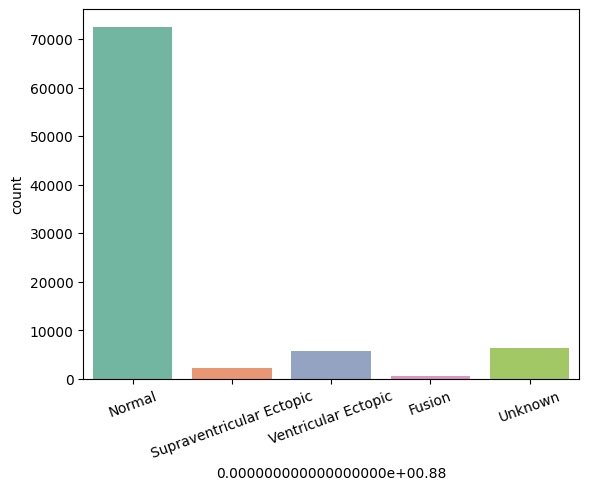

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
class_counts = pd.Series(y_train).value_counts().sort_index()
print(class_counts)
chart = sns.countplot(x=train_df.iloc[:,187], palette ="Set2")
plt.xticks(
    ticks=[0,1,2,3,4], 
    labels=['Normal', 'Supraventricular Ectopic', 
            'Ventricular Ectopic', 'Fusion', 'Unknown'],
    rotation=20
)

basic EDA


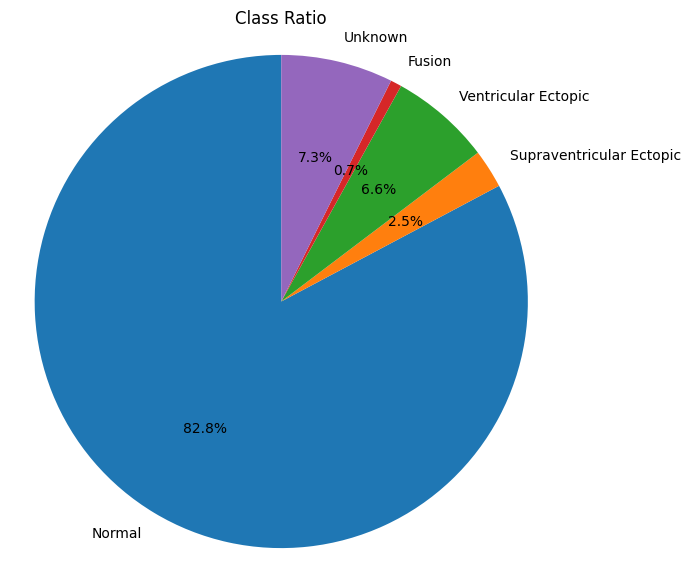

In [40]:
labels = [
    'Normal',
    'Supraventricular Ectopic',
    'Ventricular Ectopic',
    'Fusion',
    'Unknown'
]

plt.figure(figsize=(7,7))
plt.pie(
    class_counts,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90
)

plt.title("Class Ratio")
plt.axis('equal') 
plt.show()

In [42]:
labels = [
    'Normal',
    'Supraventricular Ectopic',
    'Ventricular Ectopic',
    'Fusion',
    'Unknown'
]

plt.figure(figsize=(7,7))
plt.pie(
    class_counts,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90
)

plt.title("Class Ratio")
plt.axis('equal') 
plt.show()

RandomForestClassifier(class_weight='balanced', n_estimators=300, n_jobs=-1,
                       random_state=42)

Accuracy: 0.9733680507971313


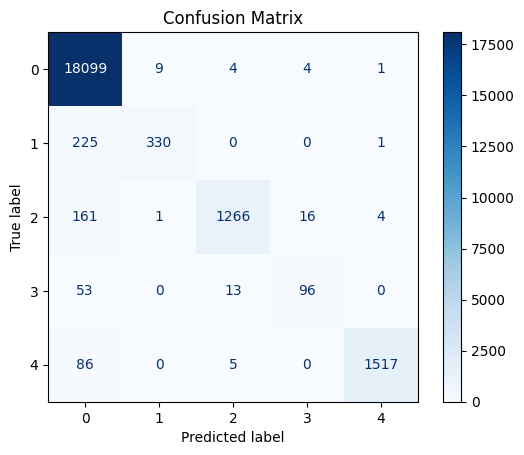

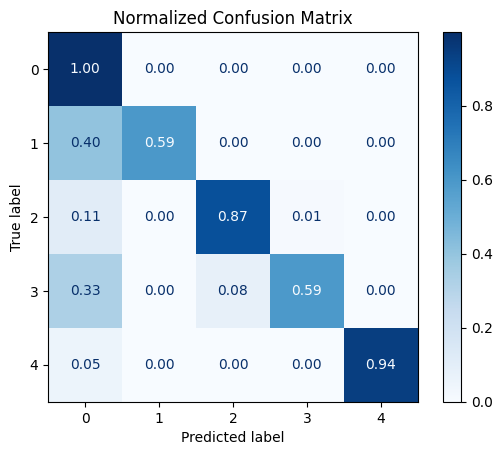

In [43]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
y_pred = rf.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print("Accuracy:", acc)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)   
plt.title("Confusion Matrix")
plt.show()

disp1 = ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
    normalize='true',
    cmap=plt.cm.Blues,
    values_format='.2f'
)

plt.title("Normalized Confusion Matrix")
plt.show()

# 